# EDA and Pre-Processing

In [1]:
#Running all needed functions, see python script "my_functions.py"
%run my_functions.py


C:\Users\Annelie Schridde\AppData\Roaming\Python\Python38\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\Annelie Schridde\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
[nltk_data] Downloading package stopwords to C:\Users\Annelie
[nltk_data]     Schridde\AppData\Roaming\nltk_data...
[nltk_data]   Package st

In [12]:
with open("../dataframes/raw_data_Books_00_short_shuffled.pkl", "rb") as f:
    df = pickle.load(f)

In [15]:
len(df)

2

In [16]:
df["review_body_clean"] = [expand_contractions(review) for review in df["review_body"].astype("str")]

In [13]:
for i, value in df[30:100].review_body.iteritems():
    print(i, value)

1541751 This is deceiving as you don't realize you are actually getting abridged versions of both these stories! We had checked out the single soccer book at our library and my boys loved it and laughed hysterically at the story! However when this 2 books in 1 set arrived, we were shocked to find half of the story missing...especially the part the kids thought was the funniest! Very disappointing! We had to search used bookstores until we finally found SpongeBob Soccer Star by itself and now we have the complete story! Save your money and buy the books separately so you have the entire story!
1998896 Great overview to get you started and help you experiment with a wide variety of techniques.  It covered many I hadn't ever thought of doing.  However, even though I'm relatively new to image transfer, I also know about a couple of methods that aren't described.  But that's okay, I still think it is a great reference and I've tried a few of their techniques already.  Everything worked exac

In [ ]:
#### TAKES LONG TO RUN!

df["review_body_clean"].progress_apply(lambda x: autocorrection(x))

In [18]:
df["review_body_clean"] = clean_complete(df["review_body_clean"].astype("str"))

D:\Master-Thesis\Code\my_functions.py:123: FutureWarning: The default value of regex will change from True to False in a future version.
  review =  review.str.replace(pat, '')
D:\Master-Thesis\Code\my_functions.py:127: FutureWarning: The default value of regex will change from True to False in a future version.
  review =  review.str.replace(r':-\)', ' smile')
D:\Master-Thesis\Code\my_functions.py:128: FutureWarning: The default value of regex will change from True to False in a future version.
  review =  review.str.replace(r':-\(', ' sad')
D:\Master-Thesis\Code\my_functions.py:129: FutureWarning: The default value of regex will change from True to False in a future version.
  review =  review.str.replace(r':-\/', ' confused')
D:\Master-Thesis\Code\my_functions.py:138: FutureWarning: The default value of regex will change from True to False in a future version.
  review =  review.str.replace(r'$|\u200d|—', '')
D:\Master-Thesis\Code\my_functions.py:149: FutureWarning: The default valu

In [19]:
for i, value in df[30:100].review_body_clean.iteritems():
    print(i, value)

In [20]:
df["review_body_clean"] = [rm_single_char(review) for review in df["review_body_clean"].astype("str")]

In [22]:
df["body_lemma"] = lemmatize(df["review_body_clean"]) 

C:\Users\Annelie Schridde\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [23]:
for i, value in df[10:30].body_lemma.iteritems():
    print(i, value)

In [24]:
df["review_head_clean"] = [expand_contractions(review) for review in df["review_headline"].astype("str")]
df["review_head_clean"].progress_apply(lambda x: autocorrection(x))
df["review_head_clean"] = clean_complete(df["review_head_clean"].astype("str"))
df["head_lemma"] = lemmatize(df["review_head_clean"]) 

100%|██████████| 2/2 [00:00<00:00,  5.67it/s]


In [25]:
for i, value in df[:30].head_lemma.iteritems():
    print(i, value)

381628 fabulous era go dicumente
528174 


In [26]:
df["combined_clean"] = df["head_lemma"] + " " + df["body_lemma"]

In [27]:
for i, value in df[:30].combined_clean.iteritems():
    print(i, value)

381628 fabulous era go dicumente photo interior house hope quality photo great photo caption detailed like fact understand historical value fully document tghis estate go wonder family pass photo album descendant photo willing share documentation downtown tiffany mansion sparse like thorough coverage long island estate hope
528174  red heart jimmy fallon


In [28]:
for i, value in df[:30].combined_clean.iteritems():
    print(i, value)

381628 fabulous era go dicumente photo interior house hope quality photo great photo caption detailed like fact understand historical value fully document tghis estate go wonder family pass photo album descendant photo willing share documentation downtown tiffany mansion sparse like thorough coverage long island estate hope
528174  red heart jimmy fallon


In [29]:
####  TAKES LONG TO RUN!

df["combined_clean"] = [strip_punctuation(review) for review in df["combined_clean"]]
df["combined_clean"] = [strip_short(review) for review in df["combined_clean"]]
df["combined_clean"] = [strip_multiple_whitespaces(review) for review in  df["combined_clean"]]

In [30]:
for i, value in df[10:30].combined_clean.iteritems():
    print(i, value)

In [31]:
df[df.combined_clean != '']

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_body_clean,body_lemma,review_head_clean,head_lemma,combined_clean
381628,US,15187657,R3AFTDY3CYY5GQ,0300117876,156757741,Louis Comfort Tiffany and Laurelton Hall: An A...,Books,4,2.0,3.0,N,Y,A Fabulous Era Gone and Not Well Dicumented,There weren't as many photos of the interior o...,2015-07-27,photos interior house hoped quality photos gre...,photo interior house hope quality photo great ...,fabulous era gone dicumented,fabulous era go dicumente,fabulous era dicumente photo interior house ho...
528174,US,3142070,R2A2SKH959I0SH,125007181X,899681967,Your Baby's First Word Will Be DADA,Books,5,0.0,1.0,N,Y,Five Stars,I ❤️ Jimmy Fallon!,2015-07-13,red heart jimmy fallon,red heart jimmy fallon,,,red heart jimmy fallon


In [3]:
with open("../dataframes/raw_data_Books_00_short_shuffled_lemma.pkl", "rb") as f:
    df = pickle.load(f)

In [33]:
split_review = df.review_body.str.split()
lens = pd.Series([len(review) for review in split_review if type(review) == list])
y = lens.value_counts()[:20]
x = y.index
data = pd.DataFrame([x,y]).T
data.columns = ["Document Length", "Count"]

In [34]:
lens.describe()

count    99995.000000
mean        34.158158
std         90.347017
min          1.000000
25%          5.000000
50%         13.000000
75%         33.000000
max       5114.000000
dtype: float64

In [27]:
split_review_clean = df.body_lemma.str.split()
lens_review_clean = pd.Series([len(review) for review in split_review_clean if type(review) == list])
y_clean = lens_review_clean.value_counts()[:20]
x_clean = y.index
data_clean = pd.DataFrame([x_clean,y_clean]).T
data_clean.columns = ["Document Length", "Count"]

In [28]:
lens_review_clean.describe()

count    100000.000000
mean         14.249640
std          38.879676
min           0.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        2476.000000
dtype: float64

In [19]:
pd.DataFrame([lens.describe(), lens_review_clean.describe()], index = ["Without Cleaning", "With Cleaning"])

,count,mean,std,min,25%,50%,75%,max
Without Cleaning,99995.0,34.158158,90.347017,1.0,5.0,13.0,33.0,5114.0
With Cleaning,100000.0,14.249640,38.879676,0.0,2.0,6.0,13.0,2476.0


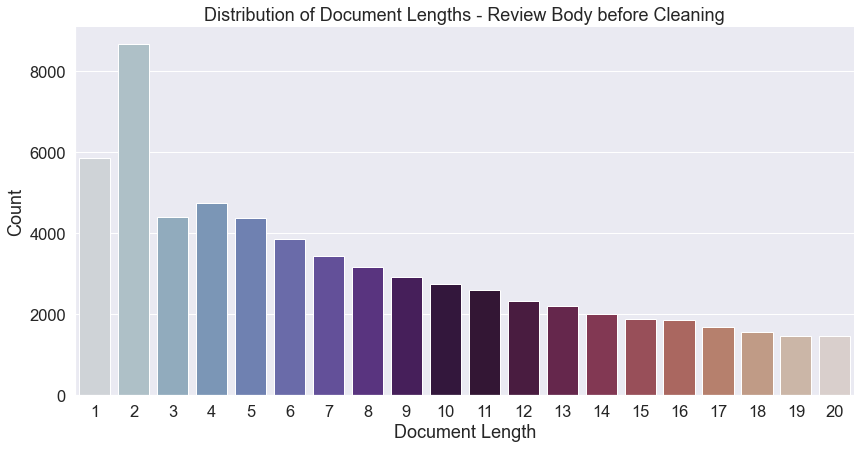

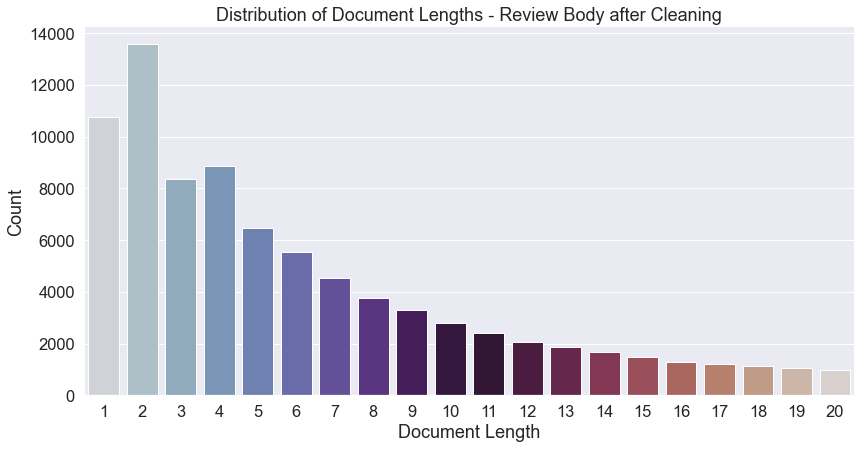

In [18]:

sns.set(font_scale = 1.5)
sns.catplot(data = data, x = "Document Length", y = "Count",kind="bar", height = 6, aspect = 2, palette = 'twilight', orient = "v").set(title='Distribution of Document Lengths - Review Body before Cleaning')
sns.catplot(data = data_clean, x = "Document Length", y = "Count",kind="bar", height = 6, aspect = 2, palette = 'twilight', orient = "v" ).set(title='Distribution of Document Lengths - Review Body after Cleaning')


In [19]:
lens.describe()

count    99995.000000
mean        34.158158
std         90.347017
min          1.000000
25%          5.000000
50%         13.000000
75%         33.000000
max       5114.000000
dtype: float64

In [20]:
lens_review_clean.describe()

count    100000.000000
mean         14.249640
std          38.879676
min           0.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        2476.000000
dtype: float64

In [23]:
all_docs = []
for row in df["combined_clean"]:
    all_docs.append(row)
    document = ' '.join(all_docs)
words = word_tokenize(document)
fdist = FreqDist(words)
df_fdist = pd.DataFrame({"Word": fdist.keys(), "Frequency":fdist.values()})
df_fdist = df_fdist.sort_values(by="Frequency", ascending = False)

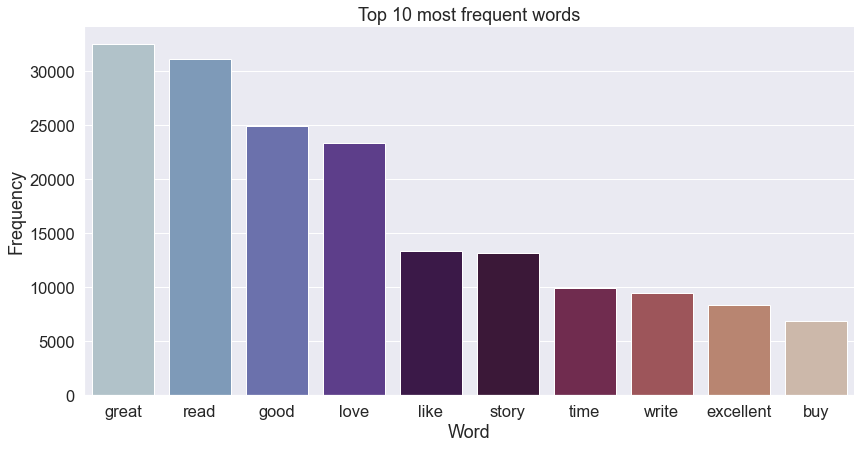

In [24]:
sns.set(font_scale = 1.5)
sns.catplot(data = df_fdist[0:10], x="Word", y="Frequency", kind="bar", height = 6, aspect = 2, palette = 'twilight', orient = "v", ).set(title='Top 10 most frequent words') # can be added into stop_words

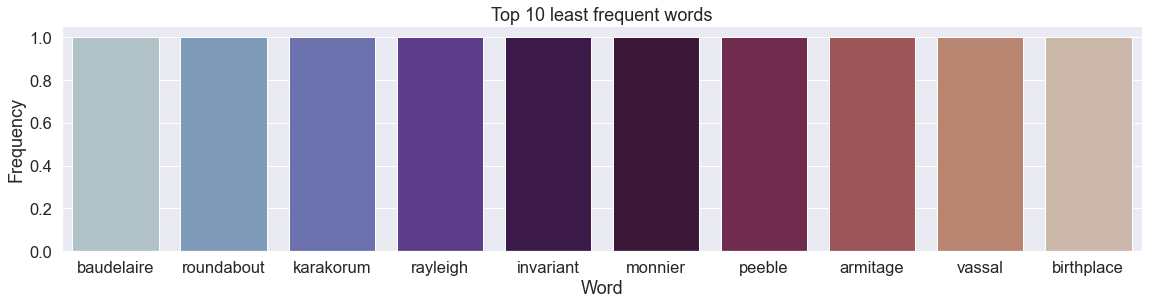

In [25]:
sns.set(font_scale = 1.5)
sns.catplot(data = df_fdist[-10:], x="Word", y="Frequency", kind="bar", height =4, aspect = 4, palette = 'twilight', orient = "v", ).set(title='Top 10 least frequent words') # can be added into stop_words

In [27]:
df[df.duplicated() == True]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_body_clean,body_lemma,review_head_clean,head_lemma,combined_clean


In [28]:
# using it later in models
stop_words = list(nltk.corpus.stopwords.words("english"))
stop_words.append("great") 
stop_words.append("read") 
stop_words.append("good") 
stop_words.append("love") 
stop_words.append("like") 
stop_words.append("story") 
stop_words.append("time") 
stop_words.append("write") 
stop_words.append("excellent") 
stop_words.append("buy") 
stop_words.append("awesome")

In [29]:
df["cut_and_clean"] = [remove_frequent_words(review, stop_words=stop_words) for review in df["combined_clean"]]

In [30]:
for i, value in df[10:30].cut_and_clean.iteritems():
    print(i, value)

2378098 
2035371 
1373727 lis well
1700367 gripping sensitive debut novel author narrative bring reader inside life woman throw relationship turmoil character vivid true life plot endlessly engage wait true
2705230 reference sell
1706017 beautiful complex anne tyler
2476887 lot info picture
2186451 life
822776 
830149 person receive gift person receive
2636333 mother
815340 want pennsylvania dutch
2633114 helpful condition
2103311 wonderful addition bible addition complete guide bible easy begin bible reader reader want expand knowledge bible
574230 volume far volume far favorite volume keep get well mistake takahiro begin tell live usage anymore heat scene recommend volume
2003118 
1915031 reprint
2636636 part part come series feel wrong judge individually small piece pie part part judge series hold series joe exceptional series character believable author portray way longing current thing series come end day salt war continue harrowing bishop family friend review series begin continu

In [32]:
df = df[df.cut_and_clean != '']

In [33]:
for index in range(len(df['cut_and_clean'])):
    words = word_tokenize(df.iloc[index, -1])
    nn_and_jj = [word for (word,pos) in nltk.pos_tag(words) if pos == 'NN' or pos == 'JJ' or pos == 'JJR' or pos == 'JJS'] # tagging words as nouns/adjectives with nltk
    df.iloc[index, -1] = " ".join(nn_and_jj)


C:\Users\Annelie Schridde\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
for i, value in df[0:30].cut_and_clean.iteritems():
    print(i, value)

381628 fabulous era document photo interior house hope quality photo photo caution fact understand historical value document estate family pass photo album descendant photo willing share documentation tiffany mansion sparse coverage long island estate hope
528174 red heart jimmy fall
833920 need helpful positive relaxing
561620 hand new new condition sign tear grimaldi family challenge face year
210752 helpful wonderful condition
1537947 nice detail easy follow recipe
202640 interesting fan steven tyler bad long sentence rush quality interesting attention able finish
293011 wife author auto order author
506963 big grip experience family face big
1373727 
1700367 sensitive debut novel author narrative bring reader life woman relationship turmoil character vivid true life plot engage wait true
2705230 reference sell
1706017 beautiful complex anne tyler
2476887 lot info picture
2186451 life
830149 person receive gift person
2636333 mother
815340 want pennsylvania dutch
2633114 helpful con

In [35]:
df.cut_and_clean

381628     fabulous era document photo interior house hop...
528174                                  red heart jimmy fall
833920                        need helpful positive relaxing
561620     hand new new condition sign tear grimaldi fami...
210752                           helpful wonderful condition
                                 ...                        
1646527                                             industry
2016363                              happy kid brother happy
313845     adorable familiar author long purchase nova ca...
2596173    birth new legend kai shore debate king kong co...
642824                                              courtney
Name: cut_and_clean, Length: 90601, dtype: object

In [36]:
corpus =[]
for review in df.cut_and_clean:
    words = tokenizer.tokenize(review)
    corpus.append(words)

In [37]:
corpus_merged = " ".join(list(df.cut_and_clean))

In [38]:
words = word_tokenize(corpus_merged)
tags = nltk.pos_tag(words)
tags

[('fabulous', 'JJ'),
 ('era', 'NN'),
 ('document', 'NN'),
 ('photo', 'NN'),
 ('interior', 'JJ'),
 ('house', 'NN'),
 ('hope', 'NN'),
 ('quality', 'NN'),
 ('photo', 'NN'),
 ('photo', 'NN'),
 ('caution', 'NN'),
 ('fact', 'NN'),
 ('understand', 'JJ'),
 ('historical', 'JJ'),
 ('value', 'NN'),
 ('document', 'NN'),
 ('estate', 'NN'),
 ('family', 'NN'),
 ('pass', 'NN'),
 ('photo', 'NN'),
 ('album', 'NN'),
 ('descendant', 'JJ'),
 ('photo', 'NN'),
 ('willing', 'JJ'),
 ('share', 'NN'),
 ('documentation', 'NN'),
 ('tiffany', 'NN'),
 ('mansion', 'NN'),
 ('sparse', 'NN'),
 ('coverage', 'NN'),
 ('long', 'JJ'),
 ('island', 'NN'),
 ('estate', 'NN'),
 ('hope', 'NN'),
 ('red', 'JJ'),
 ('heart', 'NN'),
 ('jimmy', 'NN'),
 ('fall', 'NN'),
 ('need', 'VBP'),
 ('helpful', 'JJ'),
 ('positive', 'JJ'),
 ('relaxing', 'VBG'),
 ('hand', 'NN'),
 ('new', 'JJ'),
 ('new', 'JJ'),
 ('condition', 'NN'),
 ('sign', 'NN'),
 ('tear', 'JJ'),
 ('grimaldi', 'JJ'),
 ('family', 'NN'),
 ('challenge', 'NN'),
 ('face', 'NN'),
 ('year'

In [39]:
pos_tag_dict = {"nouns": [], "adjectives": [], "other":[], "other_postag":[]}
for i in tags:
    if i[1] == "NN":
        pos_tag_dict["nouns"].append(i[0])
    if i[1] == "JJ" or i[1] =="JJR" or i[1] =="JJS":
        pos_tag_dict["adjectives"].append(i[0])
    if i[1] != "NN" or i[1] != "JJ" or i[1] != "JJR" or i[1] != "JJS":
        pos_tag_dict["other"].append(i[0]) 
        pos_tag_dict["other_postag"].append(i[1]) 


In [40]:
nouns = pd.Series(pos_tag_dict["nouns"])
adjectives = pd.Series(pos_tag_dict["adjectives"])
other = pd.Series(pos_tag_dict["other"])
other_postag = pd.Series(pos_tag_dict["other_postag"])

In [41]:
nouns.value_counts()

year             6891
life             6675
work             6281
author           6272
way              6041
                 ... 
actuate             1
rkdaspmdvv          1
fref                1
falsification       1
petite              1
Length: 22688, dtype: int64

In [42]:
adjectives.value_counts()

easy          5481
new           5442
old           4925
little        4293
wonderful     4127
              ... 
recyclable       1
leerhsen         1
symphony         1
pio              1
andddddddd       1
Length: 13606, dtype: int64

In [43]:
other.value_counts()

year           6891
life           6675
author         6412
work           6324
way            6041
               ... 
apps              1
armtech           1
temas             1
conditional       1
barrister         1
Length: 28964, dtype: int64

In [44]:
other_postag.value_counts()

NN      752336
JJ      323117
VBP      24538
VB        9488
VBD       7523
RB        5323
IN        4382
VBG       4342
VBZ       1399
JJS       1370
VBN       1165
JJR       1120
NNS        948
FW         800
NNP        693
RBR        436
CD         169
PRP        163
MD         159
CC         127
WRB         73
DT          71
RBS         57
WP          35
POS         20
RP          15
PRP$        14
WDT         14
UH          14
EX           6
PDT          5
''           1
dtype: int64

In [45]:
with open("../dataframes/raw_data_Books_00_clean_and_cut.pkl", "wb") as f:
    pickle.dump(df, f)